In [1]:
# https://playground.tensorflow.org/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# data source: https://github.com/atilsamancioglu/BTK-PythonTensorflow
df = pd.read_excel('/content/drive/My Drive/BTK-Tensorflow/bisiklet_fiyatlari.xlsx')
print(df.shape)
df.head()

(1000, 3)


,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiyat             1000 non-null   float64
 1   BisikletOzellik1  1000 non-null   float64
 2   BisikletOzellik2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


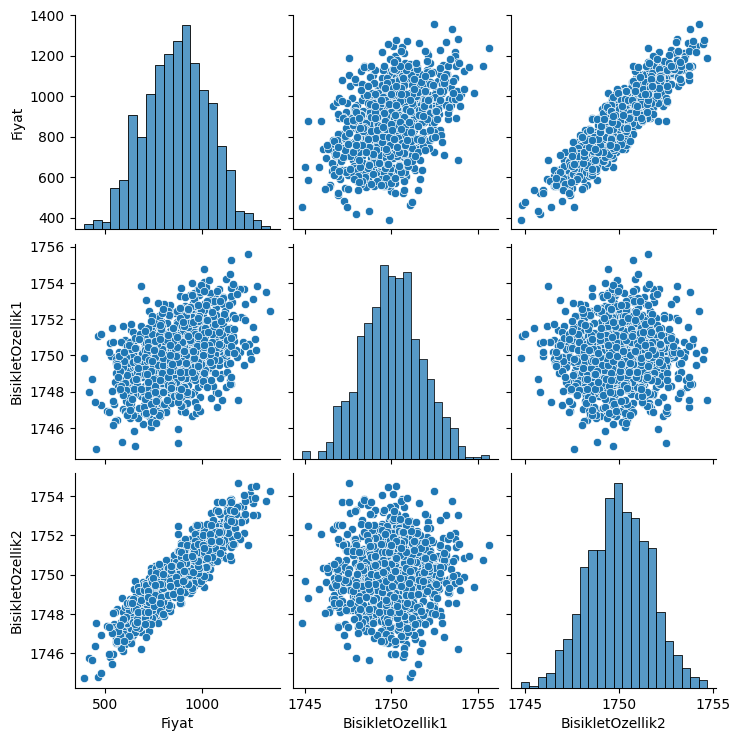

In [6]:
sns.pairplot(df)
plt.show()

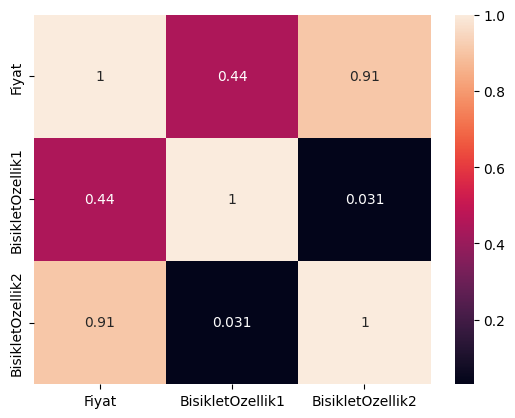

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
# independent (X) & dependent (y=target) features
X = df.drop("Fiyat", axis=1)
y = df["Fiyat"]

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=15)

In [10]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (670, 2)
X_test: (330, 2)
y_train: (670,)
y_test: (330,)


In [11]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

# hidden layers
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))

# output
model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [14]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 789484.6250
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 804050.6875 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 790107.4375 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 803258.6875 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 792820.8750 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 788917.2500
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 802746.3750 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 809947.6875 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 776950.7500 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 803051.8750 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795078.0000 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 775401.5625 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 795189.3125 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7

In [15]:
loss = model.history.history["loss"]

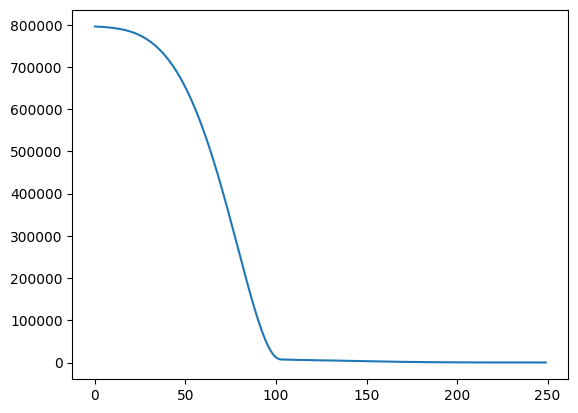

In [16]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.show()

In [17]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

Train Loss: 74.09193420410156
Test Loss: 73.9796371459961


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# R² (0–1 arası) → Modelin veriyi ne kadar iyi açıkladığı. 1’e ne kadar yakınsa o kadar iyi.
# MAE (ortalama hata) → Tahminlerin ortalama olarak gerçeklerden ne kadar saptığını gösterir. Küçük → iyi.
# MSE (hataların karelerinin ortalaması) → Büyük hatalara daha fazla ceza verir. Küçük → iyi, RMSE almak hata birimini daha anlaşılır yapar.

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
R2 Score: 0.9972627691605506
MAE: 6.880315965129022
MSE: 73.97964481305243


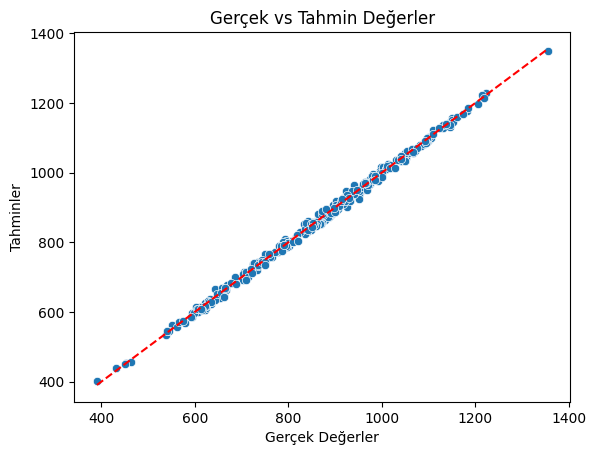

In [19]:
# y_pred'i 1D hale getir
y_pred_flat = y_pred.flatten()

# Scatter plot
sns.scatterplot(x=y_test, y=y_pred_flat)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahminler")
plt.title("Gerçek vs Tahmin Değerler")

# 45 derece referans çizgisi
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.show()

In [22]:
# yeni değerler için model nasıl tahmin üretecek ?
new_cycle_features = [[1751,1750]]
new_cycle_features = scaler.transform(new_cycle_features)

model.predict(new_cycle_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[915.26294]], dtype=float32)

In [23]:
# save model
from tensorflow.keras.models import load_model
model.save("bisiklet_modeli.h5")

In [27]:
# load model
cycle_model = load_model("bisiklet_modeli.h5", compile=False)
cycle_model.predict(new_cycle_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


array([[915.26294]], dtype=float32)